In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
sns.set()
import pmdarima as pm

In [5]:
month = pd.read_csv('Sales Data/Monthwise_updated.csv')
# flavour = month[['BRAND', 'FLP', 'TOTAL_OO']]
# flavour = month.groupby('BRAND').sum()
# flavour.head()
# plt.bar(np.arange(len(flavour.index)), flavour['FLP'])
# plt.xticks(np.arange(len(flavour.index)),flavour.index)

In [6]:
df = month
df.head()

,MONTH,SKU,Company,Product,Category,Sub_Cat,Ch4,Ch3,Ch2,Ch1
0,Jan'16,SKU_459,Br5,Prod612,Cat16,Sub_Cat82,1431,1158,715.0,98.0
1,Jan'16,SKU_456,Br5,Prod612,Cat16,Sub_Cat82,1025,660,575.0,160.0
2,Jan'16,SKU_454,Br5,Prod612,Cat16,Sub_Cat82,156,146,40.0,10.0
3,Jan'16,SKU_455,Br5,Prod612,Cat16,Sub_Cat82,200,268,69.0,13.0
4,Jan'16,SKU_457,Br5,Prod612,Cat16,Sub_Cat82,107,120,37.0,6.0


In [7]:
#Creating Date data
datee = []
yearname = []
for i in range(len(df)):
    datee.append(datetime.strptime(df['MONTH'][i][0:3] + ' ' + '20'+ df['MONTH'][i][4:], '%b %Y'))
df['NMONTH']= datee

In [ ]:
#Check the product wise, category wise sales and see the deviation
#Build logic around pricing points
#Build logic around product life cycles
#Give input to sales_person/forecasting guy to correct the forecast or ask for reasons in terms of factors affecting the sales


In [8]:
df.SUB_CAT.unique()
# df.SIZE = df.SIZE.astype(float)

AttributeError: 'DataFrame' object has no attribute 'SUB_CAT'

In [23]:
dfarr = []
ca = df.Category.unique()
le = len(df.Category.unique())
arr = df.Category.unique()
for i in range(le):
#     print(arr[i])
#     print(i)
    
    dfarr.append(df[df.Category == arr[i]])  

In [14]:
# new_df = df.groupby('NMONTH').sum()
# dfarr2 = dfarr
dfarr2 = []
for i in dfarr:
    dfarr2.append(i[['NMONTH', 'Ch1', 'Ch2', 'Ch3', 'Category']])

dfarr3 = []
count = 0
for i in dfarr2:
    j = i['Category'].astype(str)
    i = i.groupby('NMONTH').sum()
    i['CATEG'] = ca[count]
    dfarr3.append(i)
    count = count + 1
    


In [19]:
automodel = []
timeseries = []
X_test = []

counter = 0
def train_model(array):
    counter = 0
    for i in array[0:10]:
        timeseries.append(i['Ch2'][0:int(len(i)*3/4+1)])
        X_test.append(i['Ch2'][int(len(i)*3/4+1):])
        print('Timeseries data is: ', len(timeseries[counter]))
        print('Test data is: ',len(X_test[counter]))
        automodel.append(pm.auto_arima(timeseries[counter], 
                                  start_p=1, 
                                  start_q=1,
                                  test="adf",
                                  seasonal=False,
                                  trace=True))
        counter = counter + 1
    return automodel, timeseries, X_test

In [20]:
counter1 = 0
def plotarima(n_periods, timeseries, automodel, X_test):
    counter1 = 0
    # Forecast
    for i in automodel:
        fc, confint = i.predict(n_periods=n_periods, return_conf_int=True) #what is the significance of return_connf_int
        # Here we are working on the monthly index maintaining the uniformity of the data
        fc_ind = pd.date_range(timeseries[counter1].index[timeseries[counter1].shape[0]-1], periods=n_periods, freq="M")
        # Forecast series
        fc_series = pd.Series(fc, index=fc_ind)
        # Upper and lower confidence bounds
        lower_series = pd.Series(confint[:, 0], index=fc_ind)
        upper_series = pd.Series(confint[:, 1], index=fc_ind)


        plt.figure(figsize=(10, 6))
        plt.plot(timeseries[counter1])
        plt.plot(fc_series, color="red")
        plt.xlabel("date")
        plt.title(ca[counter1])
        plt.ylabel(timeseries[counter1].name)
        plt.fill_between(lower_series.index, 
                         lower_series, 
                         upper_series, 
                         color="k", alpha=.25)

        X_test[counter1].plot(legend = True)
        plt.legend(("past", "forecast", 'TEST DATA',"95% confidence interval" ), loc="upper left")
        plt.show()
        counter1 = counter1 + 1

In [21]:
automodel, timeseries, X_test = train_model(dfarr3)

Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=495.823, BIC=500.855, Time=0.164 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=518.499, BIC=521.015, Time=0.007 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=506.282, BIC=510.056, Time=0.021 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=496.957, BIC=500.731, Time=0.067 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=516.502, BIC=517.760, Time=0.010 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=497.546, BIC=503.836, Time=0.213 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=497.088, BIC=503.379, Time=0.263 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=495.409, BIC=500.441, Time=0.163 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=502.325, BIC=507.357, Time=0.034 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=499.314, BIC=506.862, Time=0.334 seconds
Total fit time: 1.297 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=487.929, BIC=492.961, Time=0.191 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=503.355, BIC=505.871, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=500.520, BIC=504.294, Time=0.019 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=486.208, BIC=489.982, Time=0.089 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=501.367, BIC=502.625, Time=0.010 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=486.833, BIC=493.124, Time=0.058 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=487.123, BIC=494.671, Time=0.352 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=485.512, BIC=493.061, Time=0.274 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=487.667, BIC=493.957, Time=0.250 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=487.427, BIC=496.233, Time=0.271 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=487.226, BIC=496.032, Time=0.292 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=486.190, BIC=493.739, Time=0.276 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (3, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=489.418, BIC=499.482, Time=0.393 seconds
Total fit time: 2.527 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=504.967, BIC=510.150, Time=0.039 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=500.860, BIC=503.452, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=502.858, BIC=506.746, Time=0.019 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=502.832, BIC=506.719, Time=0.050 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=499.888, BIC=501.184, Time=0.008 seconds
Total fit time: 0.130 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=428.522, BIC=433.705, Time=0.134 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=426.455, BIC=429.046, Time=0.007 seconds
Fit

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=373.698, BIC=378.731, Time=0.187 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=381.746, BIC=384.263, Time=0.008 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=381.435, BIC=385.210, Time=0.077 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=372.353, BIC=376.127, Time=0.058 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=379.749, BIC=381.007, Time=0.014 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=374.112, BIC=380.402, Time=0.182 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=375.089, BIC=381.380, Time=0.154 seconds
Near non-in

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=373.312, BIC=378.345, Time=0.100 seconds
Near non-invertible roots for order (0, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=380.195, BIC=385.228, Time=0.024 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=374.974, BIC=382.523, Time=0.294 seconds
Total fit time: 1.117 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=387.777, BIC=392.960, Time=0.080 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=386.756, BIC=389.348, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=387.324, BIC=391.211, Time=0.034 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=386.379, BIC=390.266, Time=0.063 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=385.558, BIC=386.853, Time=0.009 seconds
Total fit time: 0.203 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=461.763, BIC=466.946, Time=0.158 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=466.878, BIC=469.470, Time=0.007 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=466.239, BIC=470.127, Time=0.019 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=461.666, BIC=465.554, Time=0.078 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=466.229, BIC=467.525, Time=0.009 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=463.570, BIC=470.049, Time=0.183 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=465.667, BIC=472.146, Time=0.124 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=461.681, BIC=466.865, Time=0.212 seconds
Near non-invertible roots for order (0, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=467.372, BIC=472.555, Time=0.030 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=465.763, BIC=473.538, Time=0.394 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.229 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=458.874, BIC=464.057, Time=0.105 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=460.829, BIC=463.421, Time=0.009 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=458.222, BIC=462.110, Time=0.023 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=456.900, BIC=460.787, Time=0.071 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=458.853, BIC=460.149, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=458.849, BIC=464.033, Time=0.186 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=460.898, BIC=467.378, Time=0.306 seconds
Total fit time: 0.722 seconds
Timeseries data is:  28
Test data is:  8
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=443.773, BIC=448.957, Time=0.078 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=446.151, BIC=448.743, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=441.951, BIC=445.839, Time=0.015 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=442.274, BIC=446.162, Time=0.070 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=444.532, BIC=445.828, Time=0.007 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=443.769, BIC=448.952, Time=0.075 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=443.565, BIC=450.044, Time=0.210 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.473 seconds
Timeseries data is:  20
Test data is:  6
Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=290.781, BIC=294.343, Time=0.132 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=299.162, BIC=300.942, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=298.193, BIC=300.865, Time=0.015 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=288.952, BIC=291.623, Time=0.042 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=297.163, BIC=298.053, Time=0.016 s

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=290.399, BIC=294.851, Time=0.199 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=294.881, BIC=298.443, Time=0.072 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=292.288, BIC=297.630, Time=0.294 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=289.377, BIC=294.720, Time=0.258 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=291.924, BIC=296.375, Time=0.312 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=294.908, BIC=301.141, Time=0.301 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (2, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=293.022, BIC=299.255, Time=0.267 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=289.375, BIC=294.717, Time=0.243 seconds
Near non-invertible roots for order (1, 2, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=295.148, BIC=302.271, Time=0.331 seconds
Near non-invertible roots for order (3, 2, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Total fit time: 2.511 seconds


C:\Users\holisollogistics\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



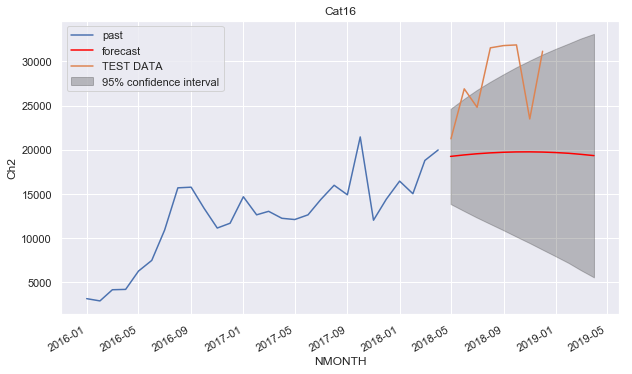

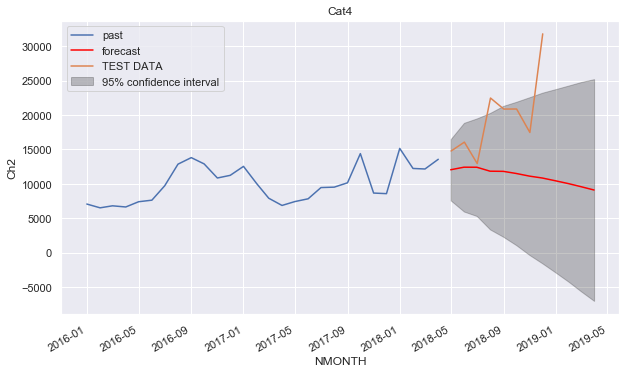

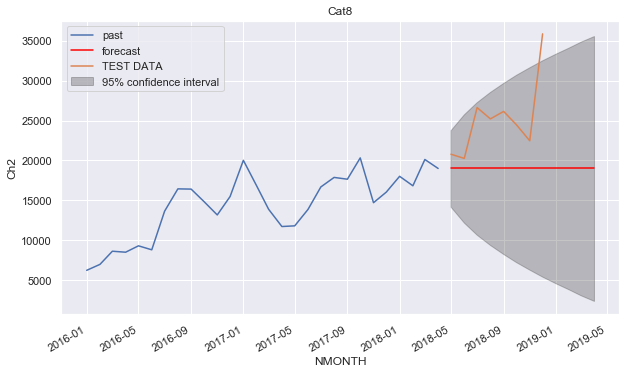

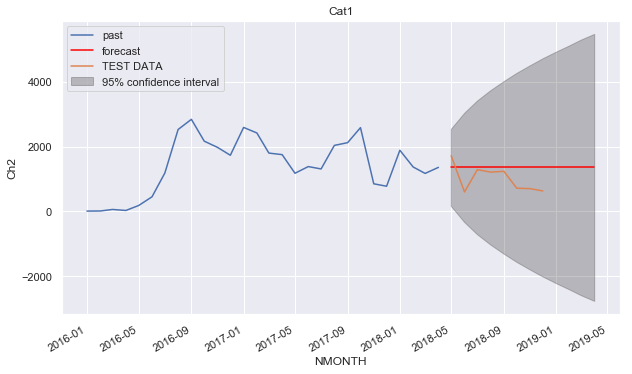

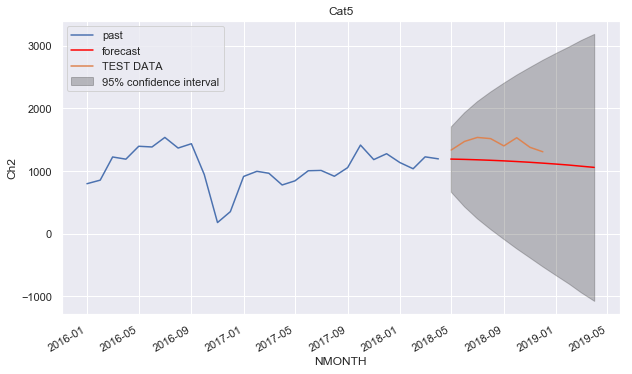

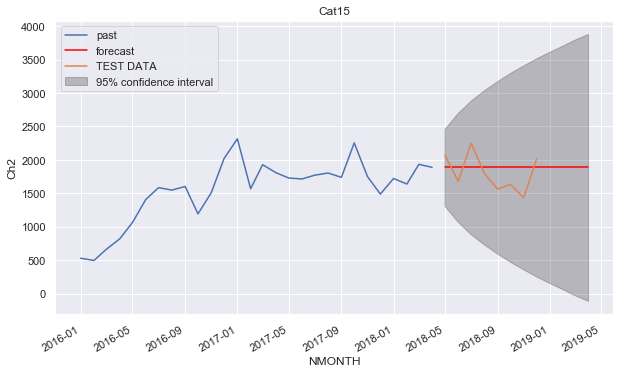

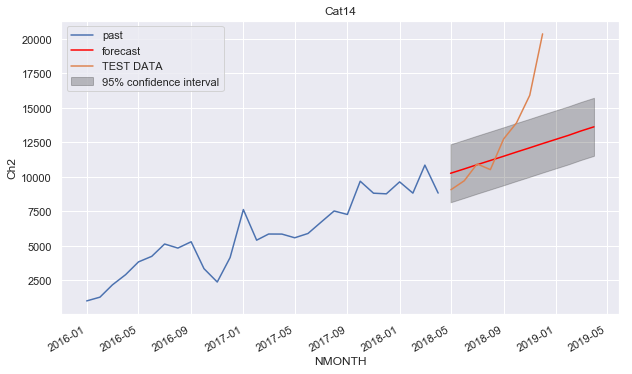

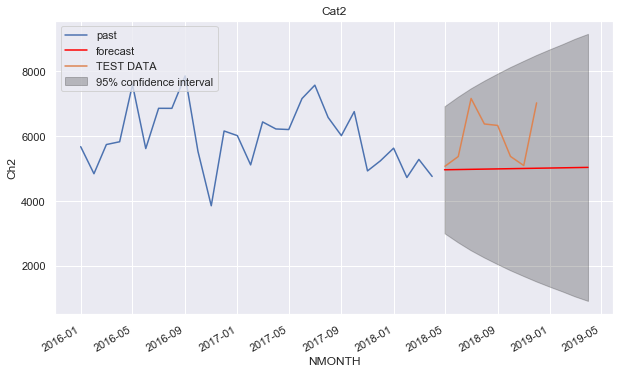

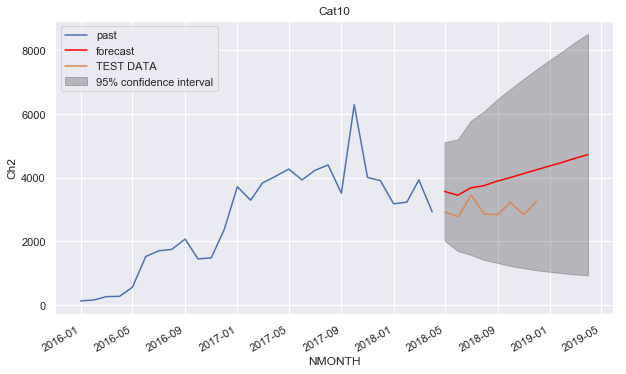

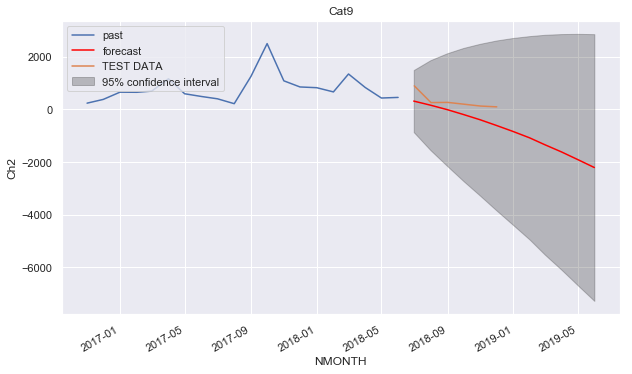

In [22]:
plotarima(12,timeseries, automodel, X_test)